In [9]:
# import necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# import the df
df = pd.read_csv('../data/makeovermonday/data/data_line_chart.csv')
df.head()

,year,united_states,russia,iran,china,canada,afghanistan,albania,algeria,angola,...,ussr,ukraine,united_arab_emirates,united_kingdom,uzbekistan,venezuela,vietnam,world,yemen,yugoslavia
0,1900,0.265826,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.265826,NaN,0.0
1,1901,0.294581,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.294581,NaN,0.0
2,1902,0.323337,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.323337,NaN,0.0
3,1903,0.352092,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.352092,NaN,0.0
4,1904,0.380848,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.380848,NaN,0.0


In [11]:
df_pivot  = df.melt(id_vars = ['year'],
                    var_name = 'country',
                    value_name = 'natural gas production (EJ)')
df_pivot.head()

,year,country,natural gas production (EJ)
0,1900,united_states,0.265826
1,1901,united_states,0.294581
2,1902,united_states,0.323337
3,1903,united_states,0.352092
4,1904,united_states,0.380848


In [12]:
df_pivot = df_pivot[df_pivot['country'].isin(['united_states', 'russia', 'iran', 'china', 'canada'])]
df_pivot.head()

,year,country,natural gas production (EJ)
0,1900,united_states,0.265826
1,1901,united_states,0.294581
2,1902,united_states,0.323337
3,1903,united_states,0.352092
4,1904,united_states,0.380848


<Axes: xlabel='year', ylabel='natural gas production (EJ)'>

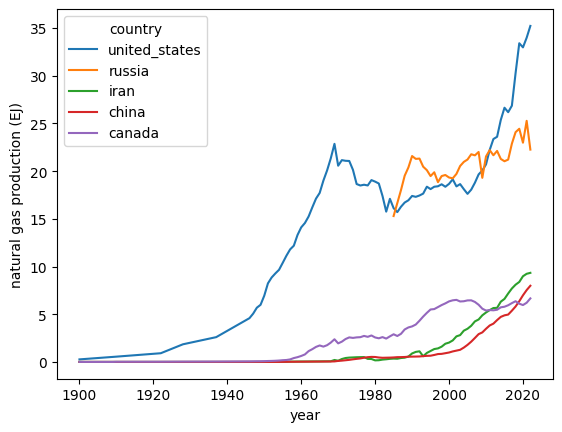

In [13]:
sns.lineplot(data = df_pivot, x = 'year', y = 'natural gas production (EJ)', hue = 'country')